## Chapter 4

#### Case Study:

#### Data:
- GitHub Collaboration network
- Nodes : users
- Edges : Collaboration on same GitHub Repository

#### Goals:
- Analyze Structure of the graph
- visualize using nxviz
- Build Simple Recommendation System.
    - in social networks allows users to connect one-another.

#### Function that we might need
- Basics

In [14]:
# How to see the Edges and Nodes
import networkx as nx
import matplotlib.pyplot as plt

# erdos_renyi_graph
G = nx.erdos_renyi_graph(n=20, p=0.2)

# find the lengths of nodes, edges
print('Length of Nodes',len(G.nodes()),'\n','Length of Edges:',len(G.edges()))

Length of Nodes 20 
 Length of Edges: 36


In [34]:
# Degree and centrality 
#  nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']
print("Degress Centrality: \n", nx.degree_centrality(G), '\n')

Degress Centrality: 
 {0: 0.15789473684210525, 1: 0.21052631578947367, 2: 0.10526315789473684, 3: 0.21052631578947367, 4: 0.15789473684210525, 5: 0.2631578947368421, 6: 0.3157894736842105, 7: 0.10526315789473684, 8: 0.15789473684210525, 9: 0.2631578947368421, 10: 0.15789473684210525, 11: 0.3157894736842105, 12: 0.15789473684210525, 13: 0.21052631578947367, 14: 0.21052631578947367, 15: 0.21052631578947367, 16: 0.05263157894736842, 17: 0.10526315789473684, 18: 0.2631578947368421, 19: 0.15789473684210525} 



In [62]:
# Function for getting in between the centrality : betweenness_centrality(G)
print("Betweenness : \n", nx.betweenness_centrality(G))
lil = nx.betweenness_centrality(G)
for n in lil:
    print(n, lil[n])
        

Betweenness : 
 {0: 0.04684438368648894, 1: 0.06669788950490704, 2: 0.016645992084588574, 3: 0.06325789220526062, 4: 0.06729154536172079, 5: 0.1295443997198383, 6: 0.16739998143506915, 7: 0.03742690058479532, 8: 0.044922491413719484, 9: 0.1470325645764242, 10: 0.007667316439246262, 11: 0.12406563546914424, 12: 0.02590778292532678, 13: 0.13265360370623527, 14: 0.14912533859902286, 15: 0.046020775845337245, 16: 0.0, 17: 0.03508771929824561, 18: 0.14036100351889824, 19: 0.06666666666666668}
0 0.04684438368648894
1 0.06669788950490704
2 0.016645992084588574
3 0.06325789220526062
4 0.06729154536172079
5 0.1295443997198383
6 0.16739998143506915
7 0.03742690058479532
8 0.044922491413719484
9 0.1470325645764242
10 0.007667316439246262
11 0.12406563546914424
12 0.02590778292532678
13 0.13265360370623527
14 0.14912533859902286
15 0.046020775845337245
16 0.0
17 0.03508771929824561
18 0.14036100351889824
19 0.06666666666666668


Characterizing the network (II)
Let's continue recalling what you've learned before about node importances, by plotting the degree distribution of a network. This is the distribution of node degrees computed across all nodes in a network.

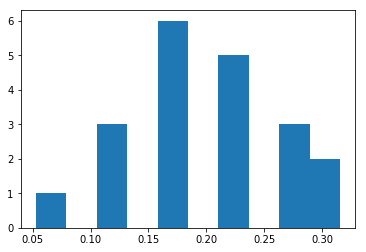

In [63]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()


In [ ]:
Characterizing the network (III)
The last exercise was on degree centrality; this time round, let's recall betweenness centrality!

A small note: if executed correctly, this exercise may need about 5 seconds to execute.

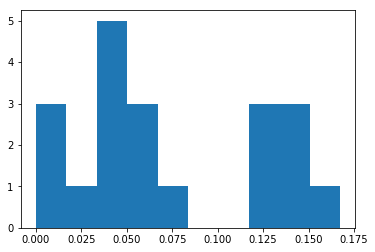

In [64]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()


#### Case Study Part 2: Visualization
- nxviz API :


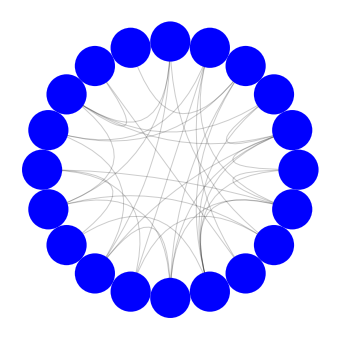

In [72]:
# Basic nxviz API

# import networkx, nxviz
import networkx as nx
import nxviz as nv

# Make a graph
# G as loaded from above

# make a circular plot
circ = nv.CircosPlot(G)

# draw the graph
#circ.draw(with_labels=True)
circ.draw()

#### connected with component Subgraph
- sets graph connected each other in one group and not connected in other group

In [84]:
# Component Subgraph 

import networkx as nx

#graph is loaded as "G"
print(nx.connected_component_subgraphs(G))

ub_graph = list(nx.connected_component_subgraphs(G))
print(ub_graph)

for g in ub_graph:
   print(len(g.nodes()))

<generator object connected_component_subgraphs at 0x1a1c52c318>
20


MatrixPlot
Let's now practice making some visualizations. The first one will be the MatrixPlot. In a MatrixPlot, the matrix is the representation of the edges.

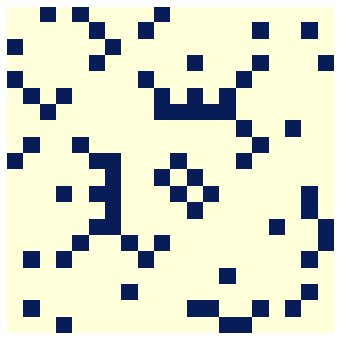

In [86]:
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

ArcPlot
Next up, let's use the ArcPlot to visualize the network. You're going to practice sorting the nodes in the graph as well.

Note: this exercise may take about 4-7 seconds to execute if done correctly.

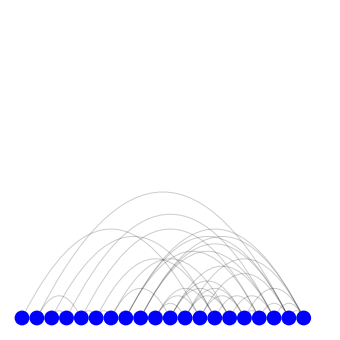

In [89]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n) 

# Create the ArcPlot object: a
a = ArcPlot(graph=G, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

CircosPlot
Finally, you're going to make a CircosPlot of the network!

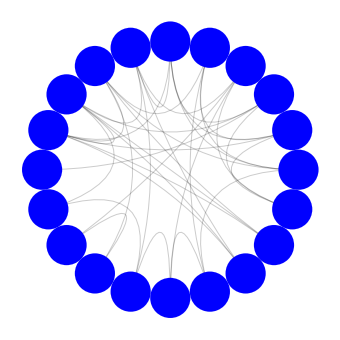

In [91]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
     G.node[n]['degree'] = nx.degree(G, n)

# Create the CircosPlot object: c
c = CircosPlot(graph=G, node_order='degree')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

#### Case study Part - III 
##### Cliques
 - Group of nodes
 - Fully connected

- Simplest is Edge
- Simplest hard is Triangle

- Maximal Cliques:
 - A clique that cannot be extended by other node

- Finding Clique
 - below code

In [94]:
# How to see the Edges and Nodes
import networkx as nx
import matplotlib.pyplot as plt

# erdos_renyi_graph
G = nx.erdos_renyi_graph(n=100, p=0.15)

# Number of cliques
findcliques = nx.find_cliques(G)

# nx.find_cliques(G)

for clique in findcliques:
    print(len(clique))



2
2
2
2
2
2
3
3
3
4
3
3
3
3
3
3
3
3
3
2
2
2
4
4
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
2
3
3
3
3
3
4
4
3
3
3
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
3
3
2
3
2
2
3
3
3
3
3
3
2
3
3
3
2
3
3
3
2
2
3
3
3
2
2
2
3
2
2
3
3
3
3
3
3
3
2
3
3
3
3
3
2
2
3
2
2
4
3
3
3
3
3
4
3
3
3
3
3
4
3
3
3
2
2
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
2
2
2
3
3
2
3
3
2
2
2
3
3
3
3
4
2
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
3
3
2
3
3
3
3
3
3
3
3
3
3
4
3
4
3
3
3
3
3
3
3
3
3
2
2
2
3
3
3
2
3
2
3
4
3
3
3
3
2
2
3
2
3
3
3
3
3
3
3
3
3
3
2
3
4
3
3
3
3
3
2
3
3
3
4
3
3
3
2
3
3
2
2
2
3
3
3
3
3
3
4
3
3
2
3
3
3
3
3
3
3
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
2
2
2
2
2
2
3
3
3
3
3
3
4
3
3
3
3
3
2
3
2
3
3
3
3
4
3
3
3
3
3
3
4
3
3
3
3
2
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
2
2
2
2
3
2
3
3
2
2
2
2
3
3
3
3
3
2
2
3
2
2
3
3
3
2
3
3
3
3
2
2
2
2
3
2
3
3
2
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
2
2


Exercise
Exercise
Finding cliques (I)
You're now going to practice finding cliques in G. Recall that cliques are "groups of nodes that are fully connected to one another", while a maximal clique is a clique that cannot be extended by adding another node in the graph.

In [95]:
# Calculate the maximal cliques in G: cliques
cliques = len(list(nx.find_cliques(G)))

# Count and print the number of maximal cliques in G
print(cliques)

516


Finding cliques (II)
Great work! Let's continue by finding a particular maximal clique, and then plotting that clique.

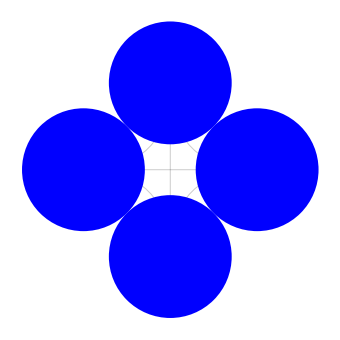

In [97]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(graph=G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

#### Case Study - IV 
#### Final Tasks
- Find the important Users
    - for githubuser with other users
    - degree_centrality
- Find the largest communities of collaborators
    - maximum_clique concept
- Build own recommendation system
    - open triangles (connect 


Finding important collaborators
Almost there! You'll now look at important nodes once more. Here, you'll make use of the degree_centrality() and betweenness_centrality() functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes". In other words, your job in this exercise is to find the user(s) that have collaborated with the most number of users.

In [98]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

[63]


Characterizing editing communities
You're now going to combine what you've learned about the BFS algorithm and concept of maximal cliques to visualize the network with an ArcPlot.

The largest maximal clique in the Github user collaboration network has been assigned to the subgraph G_lmc. Note that for NetworkX version 2.x and later, G.subgraph(nodelist) returns only an immutable view on the original graph. We must explicitly ask for a .copy() of the graph to obtain a mutatable version.

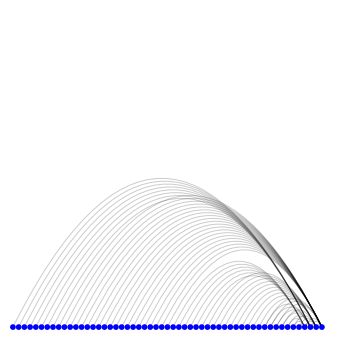

In [101]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(graph= G_lmc,node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [ ]:
Recommending co-editors who have yet to edit together
Finally, you're going to leverage the concept of open triangles to recommend users on GitHub to collaborate!

In [102]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.node(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[(3, 79), (12, 63), (57, 63), (7, 48), (7, 56), (22, 63), (57, 77)]
